## High Priority Functionality Tests for the TIKE
This covers testing for the following set of packages. In general it does an import and a couple of basic calls to ensure it works.

- lightkurve     
- eleanor        (not installed:   needs update to Tensorflow 2.4.2+)
- tess-point
- scipy
- astropy
- astroquery
- dask
- boto3
- matplotlib
- numpy
- pandas
- panel
- scipy
- scikit-learn
- bokeh
- batman
- juliet
- requests

In [1]:
#Test 1 Import statements
import lightkurve as lk
# import eleanor
from tess_stars2px import tess_stars2px_function_entry
import scipy
import astropy
from astropy.io import fits
from astroquery.mast import Catalogs
from astroquery.mast import Observations
import dask
import boto3
import matplotlib.pyplot as plt
import pandas as p
import numpy as np
import panel as pn
from scipy.fft import fft, ifft
from sklearn import linear_model
import bokeh
import juliet
import batman
import requests

## Some specific tests on each module to test higher level functionality

In [2]:
#lightkurve - this one downloads data and could take a moment
from lightkurve import search_targetpixelfile
tpf = search_targetpixelfile("HL Tau", mission='K2', campaign=13).download()

<AxesSubplot:title={'center':'Target ID: 210690913, Cadence: 4214800'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

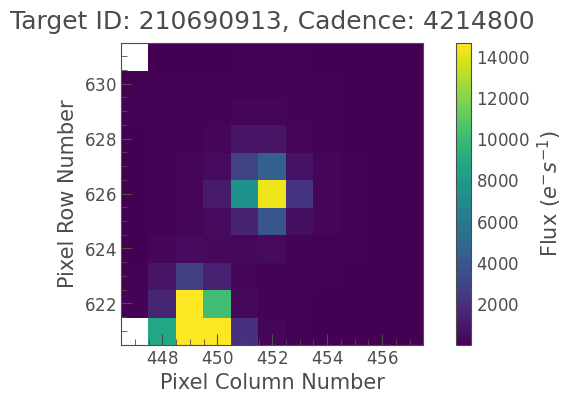

In [3]:
tpf.plot()

In [5]:
tpf.interact()

In [6]:
# scipy FFT
from scipy.fft import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [7]:
#batman
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.                       #orbital period
params.rp = 0.1                       #planet radius (in units of stellar radii)
params.a = 15.                        #semi-major axis (in units of stellar radii)
params.inc = 87.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.025, 0.025, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model

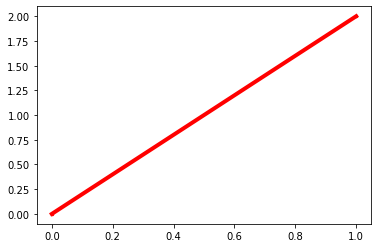

In [8]:
#matplotlib
%matplotlib inline
plt.figure()
plt.plot([0, 1], [0,2], 'r.-', linewidth=4,label='a line')

In [9]:
#tess-point tess_stars2px
ra = 84.291188 
dec = -80.469119
ticid = 261136679 # code doesn't actually use ticid, so this can be
        # any integer you like.  It is included just for convenience of 
        # keeping track of target in the output 
outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = tess_stars2px_function_entry(ticid, ra, dec)
print(outID,outSec,outCam,outCcd)

[261136679 261136679 261136679 261136679 261136679 261136679 261136679
 261136679 261136679 261136679 261136679 261136679] [ 1  4  8 11 12 13 27 28 31 34 38 39] [4 4 4 4 3 3 3 4 4 4 4 3] [2 3 4 1 4 3 3 2 3 4 1 4]


In [10]:
#juliet
t,f,ferr  = juliet.get_TESS_data('https://archive.stsci.edu/hlsps/tess-data-alerts/'+\
                                 'hlsp_tess-data-alerts_tess_phot_00403224672-'+\
                                 's01_tess_v1_lc.fits')

In [11]:
#dask
import dask
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=1)
client
#Should be able to click on the dashboard and get it to run

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 4,Total memory: 10.00 GiB
Comm: tcp://127.0.0.1:33871,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 10.00 GiB
Comm: tcp://127.0.0.1:35381,Total threads: 4
Dashboard: http://127.0.0.1:41573/status,Memory: 10.00 GiB
Nanny: tcp://127.0.0.1:32841,


In [12]:
#astroquery Observations
obs = Observations.query_criteria(obs_collection='TESS', sequence_number=[14], dataproduct_type="timeseries")
print(obs)

dataproduct_type calib_level obs_collection ... intentType  obsid    objID  
---------------- ----------- -------------- ... ---------- -------- --------
      timeseries           3           TESS ...    science 27428581 70441420
      timeseries           3           TESS ...    science 27428582 70441422
      timeseries           3           TESS ...    science 27428583 70441424
      timeseries           3           TESS ...    science 27428589 70441436
      timeseries           3           TESS ...    science 27428590 70441438
      timeseries           3           TESS ...    science 27428592 70441442
      timeseries           3           TESS ...    science 27428598 70441454
      timeseries           3           TESS ...    science 27428599 70441456
      timeseries           3           TESS ...    science 27428609 70441476
      timeseries           3           TESS ...    science 27428631 70441520
             ...         ...            ... ...        ...      ...      ...

In [13]:
#boto3
s3 = boto3.client('s3')
sqs = boto3.resource('sqs')

In [14]:
#panel
pn.extension()
def query_tic(name = "TIC 261136679"):
    """
    Creates a set of widgets to view and filter the TIC after doing a cone
    serach around a target of interest. Target can be entered after running,
    or as part of executing this function.
    
    Once the table is filtered, it can write a CSV file. This can only be done 
    
    
    Input:
        name (optional) -- String -- Star name or coordiantes
    
    """
    optcols = ['pmRA','pmDEC','Tmag','objType','typeSrc','version','HIP','TYC','UCAC','TWOMASS','SDSS','ALLWISE',\
 'GAIA','APASS','KIC','POSflag','e_pmRA','e_pmDEC','gallong','gallat','Bmag','e_Bmag','Vmag','e_Vmag','umag','e_umag',\
 'Jmag','e_Jmag','Hmag','e_Hmag','Kmag','e_Kmag','TWOMflag','GAIAmag','e_GAIAmag','e_Tmag','TESSflag','e_Teff',\
 'e_logg','MH','e_MH', 'gaiaqflag','starchareFlag','dstArcSec']
    
    starname = pn.widgets.TextInput(name="Star Name or Coordinates", value = name)
    distsearch = pn.widgets.FloatSlider(name='Radial Distance from Star (arcmin)', start = 0, end = 12, 
                                   value = 3, step = .1)
    magfilt = pn.widgets.FloatSlider(name='TESS Magnitude Limit', start=0, end=25, value = 15, step = 0.5 )
    colchoice = pn.widgets.MultiChoice(name="Choose Extra Columns", options=optcols)

    

    @pn.depends(starname, distsearch, colchoice, magfilt)
    def quick_tic_query(starname, distsearch, colchoice, magfilt):

        req_cols = ['ID', 'Tmag','Teff','logg','ra', 'dec','dstArcSec']
        cols = req_cols + colchoice
        catalogData = tic_cone_search(star_name=starname, radius_deg = distsearch/60)
        want = catalogData['Tmag'] <= magfilt
        return(catalogData[want][cols].show_in_notebook(display_length=5))
    
    @pn.depends(starname, distsearch, colchoice, magfilt)
    def filtered_file(starname, distsearch, colchoice, magfilt):

        req_cols = ['ID', 'Tmag','Teff','logg','ra', 'dec','dstArcSec']
        cols = req_cols + colchoice
        catalogData = tic_cone_search(star_name=starname, radius_deg = distsearch/60)
        want = catalogData['Tmag'] <= magfilt
        sio = StringIO()
        df = catalogData[want][cols].to_pandas()
        print(catalogData[want][cols])
        df.to_csv(sio)
        sio.seek(0)
        return(sio)    
    
    filedownload = pn.widgets.FileDownload(callback=filtered_file, filename='filtered_tic.csv', embed=False)
    
    row = pn.Row(starname, filedownload)
    mypanel = pn.Column(row, distsearch, magfilt, colchoice, quick_tic_query)

    return(mypanel)

def tic_cone_search(star_name="Kepler-10", radius_deg = .2):
    catalogData = Catalogs.query_object(star_name, radius = radius_deg, catalog = "TIC")
    
    return catalogData

query_tic()

Column
    [0] Row
        [0] TextInput(name='Star Name or C..., value='TIC 261136679')
        [1] FileDownload(callback=<function query_tic.<local..., filename='filtered_tic.csv', label='Download filtered_tic.csv...)
    [1] FloatSlider(end=12, name='Radial Distance f..., value=3)
    [2] FloatSlider(end=25, name='TESS Magnitude Limit', step=0.5, value=15)
    [3] MultiChoice(name='Choose Extra Columns', options=['pmRA', 'pmDEC', ...])
    [4] ParamFunction(function)

In [15]:
#pandas
s = p.Series([1, 3, 5, np.nan, 6, 8])
dates = p.date_range('20130101', periods=6)
df = p.DataFrame(s, index = dates)
len(df)

6

In [16]:
#scikit-learn
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([0.5, 0.5])

In [17]:
import astroquery

In [18]:
Catalog_data = astroquery.mast.Catalogs.query_object("TIC 261136679", radius=0.1, catalog="TIC")

In [19]:
Catalog_data

ID,ra,dec,pmRA,pmDEC,Tmag,objType,typeSrc,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,POSflag,e_pmRA,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,dstArcSec
str11,float64,float64,float64,float64,float64,str8,str7,str8,str5,str12,str10,str16,str1,str19,str19,str8,str1,str8,float64,float64,str5,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,int64,float64,str9,str9,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,str5,float64,float64,float64,float64,int64,str1,str8,str8,str13,float64,float64,float64,float64,float64,float64,int64,int64,float64
261136679,84.2911879979852,-80.4691197969941,311.187,1048.84,5.1054,STAR,tmgaia2,20190415,26394,9386-02614-1,048-003537,05370988-8028090,--,--,4623036865373793408,--,--,tmgaia2,0.127139,0.136315,gaia2,54.7052,0.067131,gaia2,292.513498424193,-29.7763207897747,273.907652502294,-76.0139464472642,6.252,0.021,5.65,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4.869,0.272,4.424,0.226,4.241,0.027,DDA-331-111-00d-0-0,nan,nan,nan,nan,nan,nan,nan,nan,nan,5.5128,0.00194641,0.0063,gbprp,spect,5992.1,103.582,4.3589,0.0737832,0.0887839,0.00649598,1.14889,0.0450252,1.1,0.140389,0.725369,0.141498,DWARF,1.5330863,0.0464898,18.2702,0.0226,0.0,0.0,101,0.000374727068,--,--,0.01741369,0.0,0.0,--,0.128098,0.152679,0.0393935,0.0506568,0.132371,0.150625,0.0655519,0.0820145,0.0507199,0.0422597,0.0226,0.0226,bj2018,100.012,107.153,spect,5.83855,0.003902,5.06428,0.003395,1,--,hipvmag,tycho2b3,--,2.58210378602306,2.11394740388779,84.2992797949626,-80.4646040515499,0.0639779854814068,0.0670907415196574,1,0,0.0
261139071,84.257651,-80.46656,nan,nan,13.995,STAR,2mass,20190415,--,--,--,05370183-8027596,--,--,--,--,--,2mass,nan,nan,--,nan,nan,--,292.512133,-29.782319,273.932079,-76.015549,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,13.495,nan,13.355,nan,15.086,0.324,UUD-002-001-00c-0-0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.75,jhk,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,--,nan,--,--,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,--,nan,nan,nan,nan,--,--,--,--,--,349.926,340.664,84.257651,-80.46656,349.926,340.664,--,0,22.0150762974544
724137557,84.2520122339161,-80.47060236557,nan,nan,20.476,STAR,gaia2,20190415,--,--,--,--,--,--,4623036899732204032,--,--,gaia2,nan,nan,--,nan,nan,--,292.51691252932,-29.7822737936794,273.933126623205,-76.0114191077137,nan,nan,20.7505,0.0538,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,20.6984,0.016672,0.0304,gbprp,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,--,nan,--,--,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,--,19.6861,0.07888,19.259,0.122857,--,--,gai